# 第一部分: 绘制末端距和外力随时间的变化

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
data1 = pd.read_csv('dist_vs_force_pure', sep=' ', header=None)

/Users/mac/.jackprogram/anaconda3/envs/tf20/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


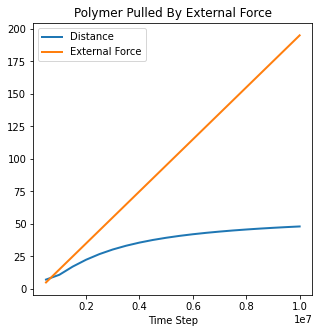

In [13]:
fig = plt.figure(figsize=(5,5))
plt.title('Polymer Pulled By External Force')
ax = fig.add_subplot(111)
ax.plot(data1[0],data1[1], label='Distance',linewidth=2.0)
ax.plot(data1[0],data1[2], label='External Force',linewidth=2.0)
plt.legend()
plt.xlabel('Time Step')
plt.savefig('./pic/result.svg')
plt.savefig('./pic/result.png')
plt.show()

# 第二部分: 绘回旋半径随时间的变化

In [14]:
# 导入numpy库, 重命名为np用来处理数据
import numpy as np

In [15]:
# 数据预处理使用Linux下的awk命令
# awk 'NR%49>9 || NR%49==0 {print $2,$3}'  lammps.out  > out.data
data = np.loadtxt('out.data')

In [16]:
# 显示坐标数据(x,y) 这里是二维的数据
data

array([[-3.99918e+01, -9.45931e-02],
       [-3.98371e+01, -1.87030e-02],
       [-3.99836e+01, -1.06391e+00],
       ...,
       [ 4.21922e+00,  5.65585e-01],
       [ 5.53129e+00,  6.28555e-01],
       [ 6.79325e+00,  7.09982e-01]])

In [17]:
# 使用数据的形状
data.shape

(40040, 2)

## 利用公式计算回旋半径
回旋半径:
$$R^2_g = \frac{1}{n}\sum_{i=0}^n(r_i -r_c)^2 \tag{1}$$
其中质心到原点的距离:
$$r_c = \frac{\sum{_i^nm_i\vec{r_i}}}{\sum{_{i=0}^nm_i}} = \frac{\sum{_{i=0}^n\vec{r_i}}}{n} \tag{2}$$
这个例子是二维的,因此:
$$r_i = (x_i,y_i) \tag{3}$$

In [29]:
num_particle = 40
rg_list = []
xc = 0
yc = 0
for i in range(data.shape[0]):
    if i % num_particle == 0:
        # 1.算出质心位置
        sum_r = 0
        for j in range(num_particle):
            x,y = data[i+j,0],data[i+j,1]
            xc = xc + x 
            yc = yc + y 
        xc = xc / num_particle
        yc = yc / num_particle
        
        # 2.计算回旋半径
        rg = 0
        for j in range(num_particle):
            x,y = data[i+j,0],data[i+j,1]
            dx = xc - x 
            dy = yc - y 
            rg += dx**2 + dy**2
        rg /= num_particle
        rg = rg**(0.5)
        rg_list.append(rg)

In [30]:
# rg_list
# data1[0]

In [31]:
len(rg_list)

1001

In [32]:
# 将list转换成np.array,便于绘图
rg_array = np.array(rg_list)

In [33]:
rg_array

array([38.52361293, 38.91786955, 23.85285748, ..., 14.34444844,
       14.48756678, 14.20159108])

In [34]:
rg_array.shape

(1001,)

In [35]:
time_step = np.array(list(range(1001)))*10000

In [36]:
time_step

array([       0,    10000,    20000, ...,  9980000,  9990000, 10000000])

In [37]:
time_step.shape

(1001,)

/Users/mac/.jackprogram/anaconda3/envs/tf20/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


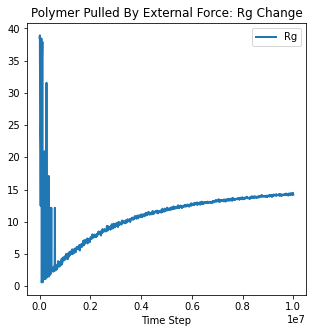

In [40]:
fig = plt.figure(figsize=(5,5))
plt.title('Polymer Pulled By External Force: Rg Change')
ax = fig.add_subplot(111)
ax.plot(time_step,rg_array, label='Rg', linewidth=2.0)
plt.legend()
plt.xlabel('Time Step')
plt.savefig('./pic/rg.svg')
plt.savefig('./pic/rg.png')
plt.show()

参考:[1] http://www.zqex.dk/index.php/teaching/lammps-demo